
🚀 訓練模型：2 隱藏層, 32 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
🔹 測試結果（2 層, 32 神經元） → MAE: 2.807, RMSE: 4.467, MAPE: 14.21%

🚀 訓練模型：2 隱藏層, 64 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
🔹 測試結果（2 層, 64 神經元） → MAE: 2.532, RMSE: 4.178, MAPE: 13.12%

🚀 訓練模型：2 隱藏層, 128 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
🔹 測試結果（2 層, 128 神經元） → MAE: 2.551, RMSE: 3.755, MAPE: 12.47%

🚀 訓練模型：3 隱藏層, 32 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔹 測試結果（3 層, 32 神經元） → MAE: 2.463, RMSE: 3.806, MAPE: 12.71%

🚀 訓練模型：3 隱藏層, 64 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
🔹 測試結果（3 層, 64 神經元） → MAE: 2.674, RMSE: 3.968, MAPE: 13.73%

🚀 訓練模型：3 隱藏層, 128 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔹 測試結果（3 層, 128 神經元） → MAE: 2.811, RMSE: 3.790, MAPE: 12.91%

🚀 訓練模型：4 隱藏層, 32 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
🔹 測試結果（4 層, 32 神經元） → MAE: 2.554, RMSE: 3.619, MAPE: 13.27%

🚀 訓練模型：4 隱藏層, 64 個神經元
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
🔹 測試結果（4 層, 64 神經元） → MAE: 2.767, RMSE: 3.969, MAPE: 13.25%

🚀 訓練模型：4 隱藏層, 128 個神經元
4/4 

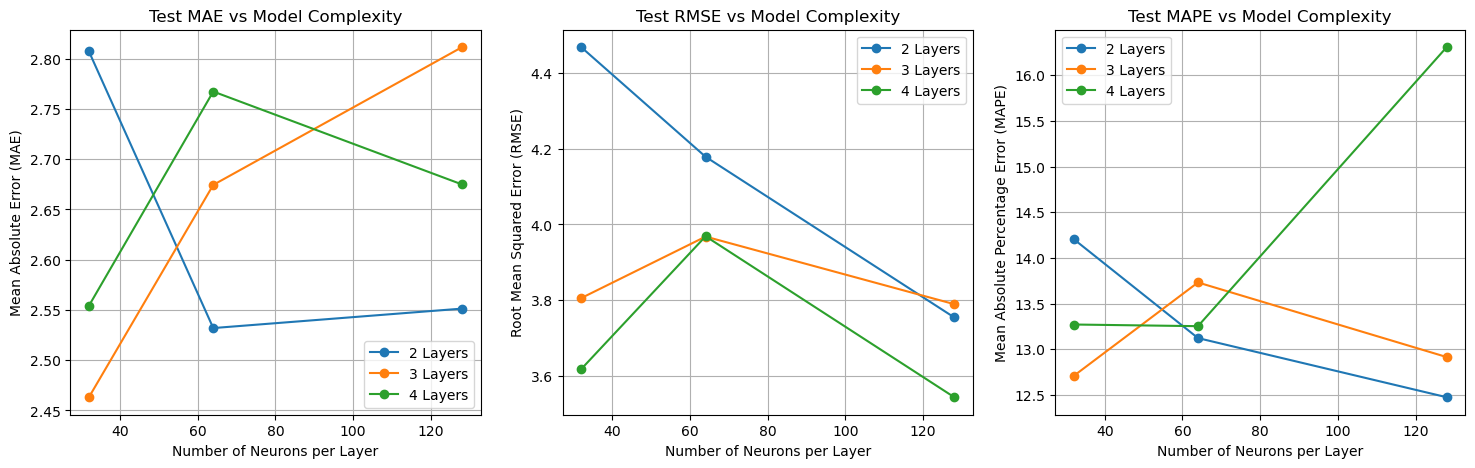

In [3]:
# 匯入必要的函式庫
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop

# 1️⃣ 載入 Boston Housing 數據集
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 2️⃣ 數據標準化（Z-score normalization）
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# 3️⃣ 定義 RMSE 和 MAPE 計算函數
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 4️⃣ 建立不同深度的神經網路
def build_model(hidden_layers=2, units=64):
    model = Sequential()
    model.add(Input(shape=(train_data.shape[1],)))  # 🔹 使用 Input() 定義輸入層
    for _ in range(hidden_layers):  # 根據設定的層數增加隱藏層
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))  # 輸出層（預測房價）

    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='mse',  # 均方誤差（MSE）
                  metrics=['mae'])  # 平均絕對誤差（MAE）
    
    return model

# 5️⃣ 設定不同的隱藏層數與神經元數
hidden_layers_list = [2, 3, 4]
units_list = [32, 64, 128]
history_dict = {}
results_dict = {}

# 6️⃣ 訓練不同深度與節點數的模型，並計算 MAE、RMSE、MAPE
for layers in hidden_layers_list:
    for units in units_list:
        print(f"\n🚀 訓練模型：{layers} 隱藏層, {units} 個神經元")
        model = build_model(hidden_layers=layers, units=units)

        # 訓練模型
        history = model.fit(train_data, train_targets, 
                            epochs=100, batch_size=16, 
                            validation_data=(test_data, test_targets),
                            verbose=0)
        
        # 儲存歷史記錄
        history_dict[(layers, units)] = history

        # 取得測試集預測結果
        predictions = model.predict(test_data).flatten()

        # 計算 MAE、RMSE、MAPE
        test_mae = np.mean(np.abs(test_targets - predictions))  # MAE
        test_rmse = rmse(test_targets, predictions)  # RMSE
        test_mape = mape(test_targets, predictions)  # MAPE

        # 儲存結果
        results_dict[(layers, units)] = {
            "MAE": test_mae,
            "RMSE": test_rmse,
            "MAPE": test_mape
        }

        print(f"🔹 測試結果（{layers} 層, {units} 神經元） → MAE: {test_mae:.3f}, RMSE: {test_rmse:.3f}, MAPE: {test_mape:.2f}%")

# 7️⃣ 視覺化結果：繪製 MAE、RMSE、MAPE 圖表
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 📌 MAE 圖表
for layers in hidden_layers_list:
    mae_values = [results_dict[(layers, units)]['MAE'] for units in units_list]
    axes[0].plot(units_list, mae_values, marker='o', label=f'{layers} Layers')

axes[0].set_title("Test MAE vs Model Complexity")
axes[0].set_xlabel("Number of Neurons per Layer")
axes[0].set_ylabel("Mean Absolute Error (MAE)")
axes[0].legend()
axes[0].grid()

# 📌 RMSE 圖表
for layers in hidden_layers_list:
    rmse_values = [results_dict[(layers, units)]['RMSE'] for units in units_list]
    axes[1].plot(units_list, rmse_values, marker='o', label=f'{layers} Layers')

axes[1].set_title("Test RMSE vs Model Complexity")
axes[1].set_xlabel("Number of Neurons per Layer")
axes[1].set_ylabel("Root Mean Squared Error (RMSE)")
axes[1].legend()
axes[1].grid()

# 📌 MAPE 圖表
for layers in hidden_layers_list:
    mape_values = [results_dict[(layers, units)]['MAPE'] for units in units_list]
    axes[2].plot(units_list, mape_values, marker='o', label=f'{layers} Layers')

axes[2].set_title("Test MAPE vs Model Complexity")
axes[2].set_xlabel("Number of Neurons per Layer")
axes[2].set_ylabel("Mean Absolute Percentage Error (MAPE)")
axes[2].legend()
axes[2].grid()

plt.show()
